In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import math
import sklearn.metrics as skl
from statistics import mean
from astropy.stats import rayleightest
from astropy import units as u
from morph_analysis_jake import *

In [2]:
#list datapath sheets
directory = r"\\163.1.248.177\Root\jswann\Morphologies"
datapaths = []
for root, subdirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith(".xlsx"):
            temppath=os.path.join(root, filename)
            datapaths.append(temppath)
print(len(datapaths))

86


In [3]:
#Pull out polar data
def single_cell_polar(datapath):
    data=e2p(datapath)
    mouseID=get_mouseID(datapath)
    sheetnames=get_sheet_names(data)
    if 'Polar Histogram - Dendrites' in sheetnames:
        df1 = pd.read_excel(data, 'Polar Histogram - Dendrites')
        polar_data = df1.iloc[0:36,6]
        mouseIDs.append(mouseID)
        
        return polar_data
    else: 
        return np.nan 
    
df_all = {}
mouseIDs=[]
for i in datapaths:

    df_single_cell = single_cell_polar(i)

    if i == datapaths[0]:
        df_all = df_single_cell

    else:

        df_all = pd.concat([df_all, df_single_cell], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)

#Sort columns into order
df_all.columns=mouseIDs
df_all=df_all.reindex(sorted(df_all.columns),axis=1)

In [4]:
dataraw=df_all
dataraw.head()

,AS016: Cell1,AS016: Cell2,AS029: Cell1,AS030: Cell1,AS035: Cell1,AS036: Cell1,AS038: Cell1,AS039: Cell1,AS039: Cell2,AS040: Cell1,...,AS276: Cell2,AS277: Cell1,AS277: Cell2,AS277: Cell3,AS278: Cell2,AS278: Cell3,AS278: Cell4,AS278: Cell5,AS279: Cell1,AS280: Cell2
0,58.7940,44.31850,40.4785,61.5245,17.14300,21.8682,45.0713,78.0655,29.3576,54.28800,...,59.3491,101.1500,28.0770,92.4583,27.5538,86.4715,97.0737,85.9643,50.6292,0.0000
1,51.1905,23.32790,97.4786,90.9126,5.92745,38.8555,30.7896,40.4554,38.1241,29.25190,...,73.3135,168.8060,63.0774,73.0542,4.9349,91.9158,88.1362,113.0920,63.6684,0.0000
2,62.5227,7.06492,59.8662,126.3040,17.35110,44.0263,41.3197,29.3701,26.8393,19.66500,...,28.2937,151.1850,90.7316,68.3138,16.5189,79.5127,77.5907,100.3580,52.5128,0.0000
3,97.9568,21.80270,99.5298,116.4510,14.62350,26.4547,43.5966,44.0261,23.4974,20.40500,...,37.6350,109.5810,189.7190,72.4213,34.4541,65.3808,61.8023,62.0996,62.8988,0.0000
4,134.8850,17.49060,48.5313,72.7581,10.00100,30.0143,40.1021,61.4438,20.8760,9.40785,...,47.3698,88.0432,128.3180,65.4404,88.8702,27.6834,12.2354,54.2253,65.5151,16.4976


In [5]:
#Normalise by longest bin
longest=dataraw.max(0)
datastd=dataraw.div(longest, axis=1)
datastd

,AS016: Cell1,AS016: Cell2,AS029: Cell1,AS030: Cell1,AS035: Cell1,AS036: Cell1,AS038: Cell1,AS039: Cell1,AS039: Cell2,AS040: Cell1,...,AS276: Cell2,AS277: Cell1,AS277: Cell2,AS277: Cell3,AS278: Cell2,AS278: Cell3,AS278: Cell4,AS278: Cell5,AS279: Cell1,AS280: Cell2
0,0.222442,0.422749,0.406697,0.321146,0.388300,0.102760,0.354231,0.304031,0.468233,0.269442,...,0.180234,0.599209,0.147993,0.410421,0.177140,0.381043,0.382697,0.506916,0.223959,0.000000
1,0.193675,0.222522,0.979391,0.474546,0.134261,0.182585,0.241986,0.157556,0.608052,0.145183,...,0.222641,1.000000,0.332478,0.324286,0.031726,0.405033,0.347462,0.666883,0.281638,0.000000
2,0.236549,0.067391,0.601490,0.659282,0.393014,0.206883,0.324746,0.114384,0.428068,0.097601,...,0.085923,0.895614,0.478242,0.303244,0.106198,0.350378,0.305888,0.591793,0.232291,0.000000
3,0.370610,0.207974,1.000000,0.607852,0.331232,0.124313,0.342641,0.171463,0.374767,0.101274,...,0.114291,0.649153,1.000000,0.321477,0.221501,0.288105,0.243645,0.366190,0.278233,0.000000
4,0.510325,0.166841,0.487606,0.379783,0.226529,0.141039,0.315176,0.239297,0.332957,0.046693,...,0.143854,0.521564,0.676358,0.290489,0.571336,0.121989,0.048236,0.319757,0.289806,0.067547
5,0.619949,0.101040,0.349083,0.418748,0.461063,0.103686,0.424718,0.128398,0.243649,0.097301,...,0.137949,0.724968,0.437771,0.293551,0.376746,0.405743,0.169381,0.506803,0.374766,0.080137
6,0.391185,0.267878,0.614575,0.388027,0.374243,0.023207,0.542662,0.132771,0.427838,0.065582,...,0.375484,0.935660,0.470378,0.659237,0.307188,0.407868,0.253647,0.063079,0.253542,0.337146
7,0.498388,0.306215,0.554432,0.395515,0.257624,0.099566,0.408277,0.135946,0.571977,0.145841,...,0.449977,0.922586,0.290196,1.000000,0.524129,0.070981,0.161073,0.134678,0.512835,0.737017
8,0.518070,0.363113,0.318489,0.558869,0.202261,0.182344,0.629989,0.233062,0.599199,0.147615,...,0.376097,0.534897,0.477958,0.603311,0.598843,0.025982,0.171890,0.153928,0.730768,0.529365
9,0.225475,0.415198,0.413487,0.504847,0.269649,0.310982,0.782983,0.288625,0.605765,0.124211,...,0.462258,0.314075,0.185684,0.576943,1.000000,0.148196,0.273545,0.175758,1.000000,1.000000


In [6]:
#Mean length per bin
means = datastd.mean(0)
means.to_frame()

#Standard deviation
std= datastd.std(0)
std.to_frame()

#Variance
var=datastd.var(0)
var.to_frame()

#40 degree bin containing longest cumulative dendritic length
def maxAngle(cell):
    binTotal=[]
    cell=list(cell)
    for i in range (0,35,4):
        binTotal.append(sum(cell[i:i+3]))
    largestBin=binTotal.index(max(binTotal))
    return (largestBin+0.5)*40

maxAngles=[]
for i in range (0,len(datastd.columns)):
    maxAngles.append(maxAngle(datastd.iloc[:,i]))
maxAngles=pd.DataFrame(maxAngles, index=datastd.columns)    



#list of metrics and column names
variables=[means, std, var, maxAngles]

variableNames=['Dendrite_polar_length_mean', 
         'Dendrite_polar_length_std',
         'Dendrite_polar_length_variance',
         'Dendrite_polar_longest_bin']


#Create dataframe
perams=pd.concat(variables, axis=1)
perams.columns=variableNames
perams=perams.T
perams

,AS016: Cell1,AS016: Cell2,AS029: Cell1,AS030: Cell1,AS035: Cell1,AS036: Cell1,AS038: Cell1,AS039: Cell1,AS039: Cell2,AS040: Cell1,...,AS276: Cell2,AS277: Cell1,AS277: Cell2,AS277: Cell3,AS278: Cell2,AS278: Cell3,AS278: Cell4,AS278: Cell5,AS279: Cell1,AS280: Cell2
Dendrite_polar_length_mean,0.398822,0.430521,0.374605,0.327464,0.321695,0.373783,0.459234,0.379131,0.638801,0.345150,...,0.316172,0.430261,0.279096,0.369233,0.290452,0.317195,0.343795,0.429309,0.252949,0.260038
Dendrite_polar_length_std,0.211449,0.252960,0.300087,0.236692,0.279975,0.257125,0.181563,0.255947,0.186113,0.238962,...,0.214180,0.307319,0.203994,0.182603,0.200737,0.251336,0.219321,0.231483,0.217067,0.269596
Dendrite_polar_length_variance,0.044711,0.063989,0.090052,0.056023,0.078386,0.066113,0.032965,0.065509,0.034638,0.057103,...,0.045873,0.094445,0.041614,0.033344,0.040295,0.063170,0.048102,0.053584,0.047118,0.072682
Dendrite_polar_longest_bin,260.000000,140.000000,340.000000,100.000000,340.000000,140.000000,100.000000,340.000000,300.000000,180.000000,...,300.000000,20.000000,60.000000,100.000000,100.000000,300.000000,300.000000,260.000000,100.000000,100.000000


In [8]:
#Export data to excel
perams.to_excel('E:\\Jake\\Morphologies_PolarMetrics.xlsx')

<IPython.core.display.Javascript object>


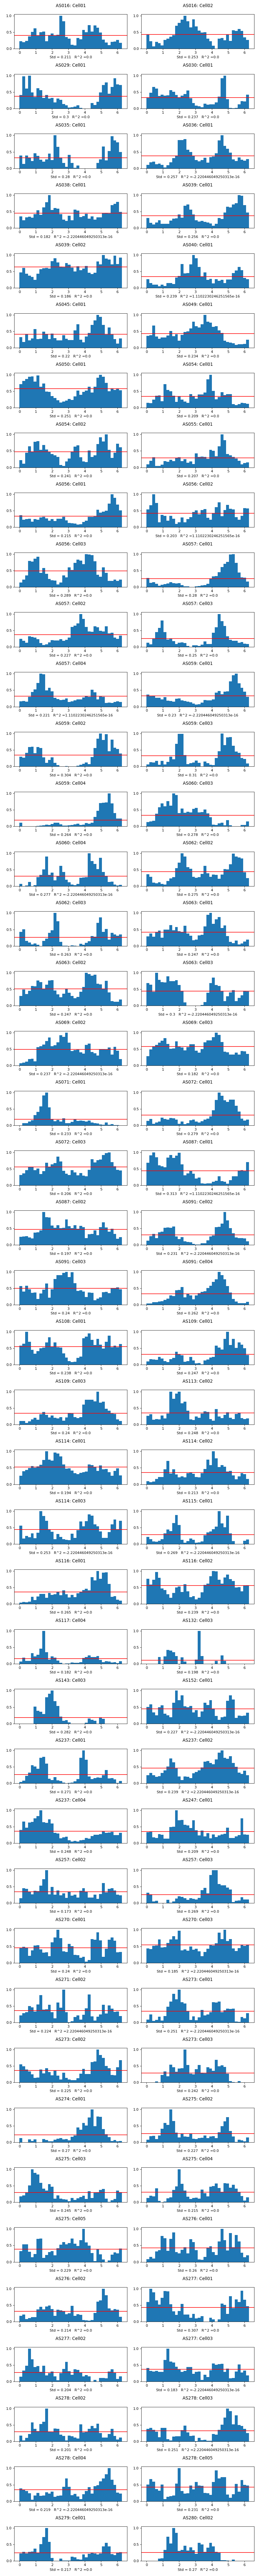

In [22]:
#plot linear histograms
def plot_hist(lengths,location,title,std,avrg):
    bins=np.radians(np.linspace(5,355,36))
    ax = plt.subplot(43,2,location, polar=False)
    ax.bar(bins,lengths, width=2*np.pi/36)
    ax.set_title(title, pad=20)
    r2=skl.r2_score(lengths, avrg)
    ax.set_xlabel('Std = ' + str(np.around(std,3))+'   R^2 ='+str(r2))
    ax.axhline(y=avg[0], color ='r', linestyle='-')
    return


fig, axes=plt.subplots(29,2, figsize=(10,100))

for i in range(0,len(dataraw.columns)):
    avg= [mean(datastd.T.values[i])]*len(datastd.T.values[i])
    plot_hist(datastd.T.values[i], i+1, datastd.columns[i], perams.iat[1,i], avg)

plt.tight_layout()
plt.show()
fig.savefig('E:\\Jake\\normalised_linear_histograms.png')

<IPython.core.display.Javascript object>


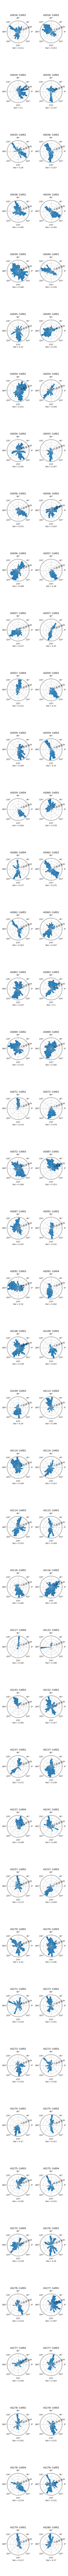

In [23]:
#plot polar histograms
def plot_hist(lengths,location,title,std, avrg):
    bins=np.radians(np.linspace(5,355,36))
    ax = plt.subplot(43,2,location, polar=True)
    ax.bar(bins,lengths, width=2*np.pi/36)
    ax.set_title(title, pad=20)
    ax.set_xlabel('Std = ' + str(np.around(std,3)))
    return


fig, axes=plt.subplots(58,1, figsize=(5,190))

for i in range(0,len(datastd.columns)):
    avg= [mean(datastd.T.values[i])]*len(datastd.T.values[i])
    plot_hist(datastd.T.values[i], i+1, datastd.columns[i], perams.iat[1,i], avg)

plt.tight_layout()
plt.show()
fig.savefig('E:\\Jake\\normalised_polar_histograms.png')

In [24]:
tests=[]
for j in range(0,len(dataraw.columns)):
    magnitudes=[]
    for i in range(0,35):
        magnitude=int(round(dataraw.iloc[i,j]))
        magnitudes=magnitudes+([i*10+5]*round(magnitude/10))
    magnitudes=np.array(magnitudes)*u.deg
    tests.append(rayleightest(magnitudes))
pd.Series(tests).to_frame
tests

[<Quantity 0.00193146>,
 <Quantity 0.00020385>,
 <Quantity 9.25168532e-13>,
 <Quantity 0.0012693>,
 <Quantity 0.00914865>,
 <Quantity 3.36874416e-07>,
 <Quantity 0.2270363>,
 <Quantity 0.00039102>,
 <Quantity 0.69793845>,
 <Quantity 1.17262534e-07>,
 <Quantity 0.00039697>,
 <Quantity 4.418696e-07>,
 <Quantity 3.51755378e-11>,
 <Quantity 9.98117835e-05>,
 <Quantity 0.08218634>,
 <Quantity 5.03133545e-10>,
 <Quantity 1.28531569e-11>,
 <Quantity 0.01661864>,
 <Quantity 0.02011561>,
 <Quantity 2.03340052e-32>,
 <Quantity 1.14265364e-13>,
 <Quantity 0.01300789>,
 <Quantity 2.38498197e-06>,
 <Quantity 7.07385378e-19>,
 <Quantity 5.480398e-15>,
 <Quantity 0.19261911>,
 <Quantity 5.83033225e-22>,
 <Quantity 5.50164948e-26>,
 <Quantity 0.00417239>,
 <Quantity 0.03307001>,
 <Quantity 0.03335142>,
 <Quantity 2.58867191e-05>,
 <Quantity 0.25182156>,
 <Quantity 0.00021517>,
 <Quantity 2.90667391e-07>,
 <Quantity 0.0200059>,
 <Quantity 7.04950916e-21>,
 <Quantity 1.23407504e-21>,
 <Quantity 0.194135